### Category 4: Unsupervised ML on Structured data - Recommender System

> Dataset - MovieLens available at movielens.org
> Simple illustration of Item-Item collaborative filtering

In [96]:
# Import libraries
import pandas as pd
import numpy as np

In [97]:
r_cols = ['user_id','movie_id','rating']
ratings = pd.read_csv('u.data',sep='\t', encoding="ISO-8859-1",header=None,names=r_cols,usecols=range(0,3))

m_cols = ['movie_id','movie_name']
movies = pd.read_csv('u.item',sep='|', encoding="ISO-8859-1",header=None,names=m_cols,usecols=range(0,2))
movies.head()

ratings=pd.merge(movies,ratings)

In [98]:
ratings.head()

,movie_id,movie_name,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


** Exploratory Data Analysis **

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [100]:
# Getting the number of ratings & average rating for each movie
movieStats = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieStats.columns = [' '.join(col).strip() for col in movieStats.columns.values]
movieStats.reset_index(inplace=True)
movieStats.head()

,movie_id,rating size,rating mean
0,1,452,3.878319
1,2,131,3.206107
2,3,90,3.033333
3,4,209,3.550239
4,5,86,3.302326


In [101]:
movieStats = pd.merge(movieStats[['movie_id','rating size','rating mean']],ratings[['movie_name','movie_id']],on='movie_id')
movieStats.drop_duplicates(inplace=True)

In [102]:
# Getting the popular movies - Popular defined as movies that have more than 100 ratings. 100 = parameter that can be modified
popular_movies = movieStats[movieStats['rating size'] > 100]
popular_movies.sort_values('rating size',ascending=False).head()

,movie_id,rating size,rating mean,movie_name
6402,50,584,4.359589,Star Wars (1977)
39424,258,509,3.803536,Contact (1997)
14385,100,508,4.155512,Fargo (1996)
26167,181,507,4.007890,Return of the Jedi (1983)
45750,294,485,3.156701,Liar Liar (1997)


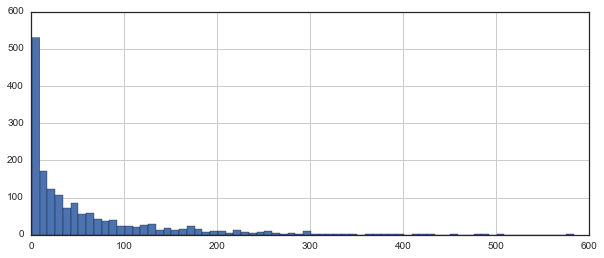

In [103]:
plt.figure(figsize=(10,4))
movieStats['rating size'].hist(bins=70)

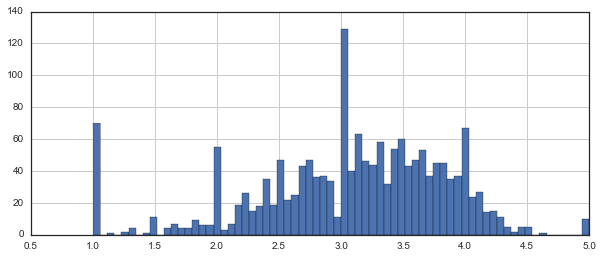

In [104]:
plt.figure(figsize=(10,4))
movieStats['rating mean'].hist(bins=70)

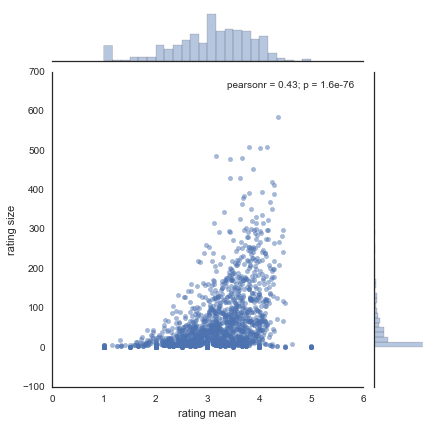

In [105]:
sns.jointplot(x='rating mean',y='rating size',data=movieStats,alpha=0.5)

** Creating a matrix with user_id as rows and movies as columns **

In [106]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['movie_name'],values='rating')
movieRatings.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Let's choose two movies for recommendation - Star Wars & Liar Liar **

** What are the similar movies to Star Wars? **

In [107]:
starwars_user_ratings = movieRatings['Star Wars (1977)']
starwars_similarMovies = movieRatings.corrwith(starwars_user_ratings)
starwars_similarMovies = pd.DataFrame(starwars_similarMovies,columns=['similarity'])
starwars_similarMovies.dropna(inplace=True)
starwars_similarMovies.reset_index(inplace=True)
starwars_similarMovies.sort_values('similarity',ascending=False,inplace=True)
starwars_similarMovies.head(10)

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,movie_name,similarity
598,Hollow Reed (1996),1.0
1207,Stripes (1981),1.0
1192,Star Wars (1977),1.0
800,Man of the Year (1995),1.0
119,"Beans of Egypt, Maine, The (1994)",1.0
1087,Safe Passage (1994),1.0
924,"Old Lady Who Walked in the Sea, The (Vieille q...",1.0
945,"Outlaw, The (1943)",1.0
741,"Line King: Al Hirschfeld, The (1996)",1.0
622,Hurricane Streets (1998),1.0


In [108]:
starwars_similarMovies = pd.merge(starwars_similarMovies[['movie_name','similarity']],
                                  popular_movies[['movie_name','rating mean']],on='movie_name')

In [109]:
starwars_similarMovies.head(10)

,movie_name,similarity,rating mean
0,Star Wars (1977),1.000000,4.359589
1,"Empire Strikes Back, The (1980)",0.748353,4.206522
2,Return of the Jedi (1983),0.672556,4.007890
3,Raiders of the Lost Ark (1981),0.536117,4.252381
4,Austin Powers: International Man of Mystery (1...,0.377433,3.246154
5,"Sting, The (1973)",0.367538,4.058091
6,Indiana Jones and the Last Crusade (1989),0.350107,3.930514
7,Pinocchio (1940),0.347868,3.673267
8,"Frighteners, The (1996)",0.332729,3.234783
9,L.A. Confidential (1997),0.319065,4.161616


** What are the similar movies to Liar Liar? **

In [110]:
liarliar_user_ratings = movieRatings['Liar Liar (1997)']
liarliar_similarMovies = movieRatings.corrwith(liarliar_user_ratings)
liarliar_similarMovies = pd.DataFrame(liarliar_similarMovies,columns=['similarity'])
liarliar_similarMovies.dropna(inplace=True)
liarliar_similarMovies.reset_index(inplace=True)
liarliar_similarMovies.sort_values('similarity',ascending=False,inplace=True)
liarliar_similarMovies.head(10)

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Karthikeyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,movie_name,similarity
452,For Ever Mozart (1996),1.0
826,Mina Tannenbaum (1994),1.0
909,Of Human Bondage (1934),1.0
755,Love and Death on Long Island (1997),1.0
662,Johnny 100 Pesos (1993),1.0
721,Liar Liar (1997),1.0
719,Legal Deceit (1997),1.0
839,Moonlight and Valentino (1995),1.0
1365,"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
171,"Bonheur, Le (1965)",1.0


In [111]:
liarliar_similarMovies = pd.merge(liarliar_similarMovies[['movie_name','similarity']],
                                  popular_movies[['movie_name','rating mean']],on='movie_name')

In [112]:
liarliar_similarMovies.head(10)

,movie_name,similarity,rating mean
0,Liar Liar (1997),1.000000,3.156701
1,Batman Forever (1995),0.516968,2.666667
2,"Mask, The (1994)",0.484650,3.193798
3,Down Periscope (1996),0.472681,2.702970
4,Con Air (1997),0.469828,3.459854
5,Pretty Woman (1990),0.469790,3.323171
6,101 Dalmatians (1996),0.469765,2.908257
7,Michael (1996),0.442022,3.319328
8,Waterworld (1995),0.438405,2.803922
9,Indiana Jones and the Last Crusade (1989),0.414427,3.930514
